# IMDB Review Classification using Word Embeddings(GloVe) #
## PROBLEM STATEMENT
In this project we will classify the IMDB reviews for positive and negative reviews using sentiment analysis or emotion AI.<BR>
    
## What is Sentiment Analysis?
In essence, it is the process of determining the emotional tone behind a series of words, used to gain an understanding of the<br>the attitudes, opinions and emotions expressed within an online mention.<br>
 
## What is IMDB?
IMDb, also known as Internet Movie Database, is an online database of information related to world films, television programs,<br>home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot <br>summaries, trivia, and fan reviews and ratings

## How to perform Classification on Reviews using Sentiment Analysis?##

## Steps involved to perform sentiment analysis on given data set
## Step 1: Get some sentiment examples
IMDB review dataset is loaded<br>
## Step 2: Extract features from examples
Transform each example into a Vectorure vector.<br>
Here we are using GloVe(Global Vectors) Word Embeddings for Vectorure vectors.
## What is GloVe?
GloVe stands for global vectors for word representation. It is an unsupervised learning algorithm developed by Stanford for generating word embeddings by aggregating global word-word co-occurrence matrix from a corpus.
<br>
## What are Word Embeddings?
In very simplistic terms, Word Embeddings are the texts converted into numbers and there may be different numerical representations of the same text..
What word2vec does is, it updates the word vectors of a particular word by the probability of finding the word in the vicinity of the context words(i.e. The words around it).So the words which occur around same context words will have word vectors with much similarity.
Ex. ‘need’ and ‘required’ generally have the same context words around it and thus making them similar in meaning. So, the word vectors of ‘need’ and ‘required’ will be very much similar. 

In this project we will be using a variation of word2vec i.e. GloVe(Global Vectors for Word Representation by Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014).
We will use pre-trained word vectors in the project that is open sourced in the Stanford website.

## Step 3: Train the parameters
This is where your model will learn from the data. There are multiple ways of using Vectorures to generate an output, algorithms<br> used in this dataset are Logistic Regression,Naive Bayes, SVM and Decision Trees.<br>
## Step 4: Test the model 
After we have trained the parameters to fit the training data, we have to make sure our model generalizes to new data, because <br>it's really easy to overfit. The general way of regularizing the model is to prevent parameters from having extreme values.
and thus this model uses GridSearchCV model for hyperparameter tuning.
## Why GridSearchCV for Tuning?
GridSearchCV lets you combine an estimator with a grid search preamble to tune hyper-parameters. The method picks the optimal <br>parameter from the grid search and uses it with the estimator selected by the user. GridSearchCV inherits the methods from <br>the classifier, so yes, you can use the .score, .predict, etc.. methods directly through the GridSearchCV interface.
## Step 5: Compare the Models and derive Observations

### lets follow the steps!###

import all necessary modules

In [350]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection  import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV


In [351]:
df = pd.read_csv("imdb_labelled22.csv")

## Data Visualization ##

In [318]:
df.head()

,Reviews,sentiments
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [319]:
df.describe(include='all')

,Reviews,sentiments
count,998,998.000000
unique,996,NaN
top,Definitely worth checking out.,NaN
freq,2,NaN
mean,NaN,0.498998
std,NaN,0.500250
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [320]:
df.shape

(998, 2)

### check for any missing value ###

In [321]:
df.isnull().values.any()

False

### Let's visualize data###
## EDA##

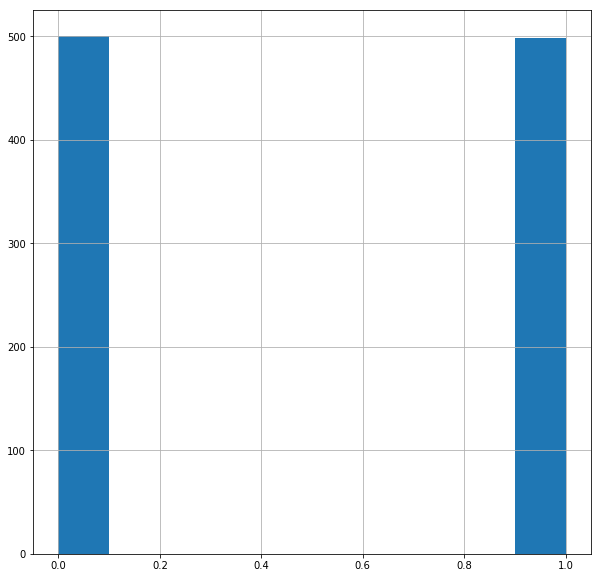

In [322]:
df['sentiments'].hist(figsize=(10,10))

Negative reviews are slightly more than positive reviews.<br>
which shows that people are generally not satisfied.<br>

### lets find out high frequecy of negative and positive words### 

In [352]:
reviews = df.Reviews.str.cat(sep=' ')
                                         #function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)                  #removing duplicates
print(len(vocabulary))
frequency_dist = nltk.FreqDist(vocabulary)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

3419


['twice',
 'trysts',
 'ordeal',
 'super',
 'editing',
 'recent',
 'nonetheless',
 'twist',
 'Bergen',
 'interacting',
 'forced',
 'class',
 'someone',
 'hockey',
 'trilogy',
 'had',
 'shed',
 '54',
 'renowned',
 'ridiculous',
 'back',
 'lower',
 'Ackerman',
 'grace',
 'numbers',
 'watching',
 'forgettable',
 'often',
 'feel-good',
 '90',
 'schizophrenic',
 'treachery',
 'ho',
 'continually',
 'acting-wise',
 'Ponyo',
 'efforts',
 'DonLevy',
 'heads',
 'credit',
 'climax',
 'poet',
 'meld',
 'where',
 'MOVIE',
 'parents',
 'actions',
 'art',
 'goes',
 'cruel']

In [353]:
stop_words = set(stopwords.words('english')) #stopwords are  very commomly used words(for eg. is,am,..etc.)
tokens = [w for w in vocabulary if w not in stop_words]
tokens

['twice',
 'trysts',
 'ordeal',
 'super',
 'editing',
 'recent',
 'nonetheless',
 'twist',
 'Bergen',
 'interacting',
 'forced',
 'class',
 'someone',
 'hockey',
 'trilogy',
 'shed',
 '54',
 'renowned',
 'ridiculous',
 'back',
 'lower',
 'Ackerman',
 'grace',
 'numbers',
 'watching',
 'forgettable',
 'often',
 'feel-good',
 '90',
 'schizophrenic',
 'treachery',
 'ho',
 'continually',
 'acting-wise',
 'Ponyo',
 'efforts',
 'DonLevy',
 'heads',
 'credit',
 'climax',
 'poet',
 'meld',
 'MOVIE',
 'parents',
 'actions',
 'art',
 'goes',
 'cruel',
 'Brian',
 'delights',
 'Coppola',
 'adorable',
 'Sundays',
 'Steve',
 'male',
 'weaker',
 'portrayed',
 'Plmer',
 'coastal',
 'court',
 'ca',
 'decent',
 'jerky',
 'bipolarity',
 'hell',
 'Gas',
 'unbelievable',
 'miss',
 'obvious',
 'dreams',
 'romantic',
 'Regardless',
 'single',
 'Peter',
 'paint',
 'dialogs',
 'dollars',
 'paced',
 'sloppy',
 'astronaut',
 'clients',
 'require',
 'stinks',
 'alike',
 'Horse',
 'contained',
 'addition',
 'Const

In [354]:

def preprocess(raw_text, flag):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_text)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    
    if flag == 1:
        return(" ".join(words))
    else:
        return(len(words))

In [355]:
df['clean_text']=df['Reviews'].apply(lambda x: preprocess(x, flag=1)) #cleaning data
df['Text_length']=df['Reviews'].apply(lambda x: preprocess(x, flag=2)) # finding minimum length

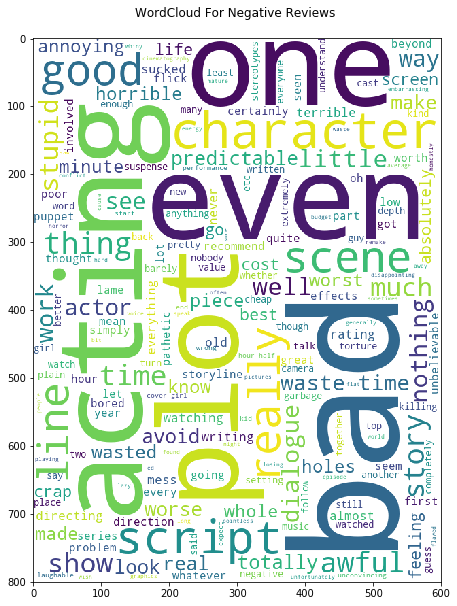

In [356]:
Neg=df[df['sentiments']==0]
Neg_Token=list()
for i in Neg['clean_text']:
    if 'movie' in i or 'film' in i:
        pass
    else:
        Neg_Token=Neg_Token+i.split(" ")
Neg_Corpus=" ".join(Neg_Token)
wordcloud=WordCloud(height=800,width=600,background_color='white').generate(Neg_Corpus)

plt.figure(figsize=(15,10))
plt.title("WordCloud For Negative Reviews \n")
plt.imshow(wordcloud)
plt.show()

### Highly used words in Negative reviews: ###
 1.bad<br>
 2.acting<br>
 3.even<br>
 4.one<br>
 5.plot<br>
 6.script<br>
 7.character

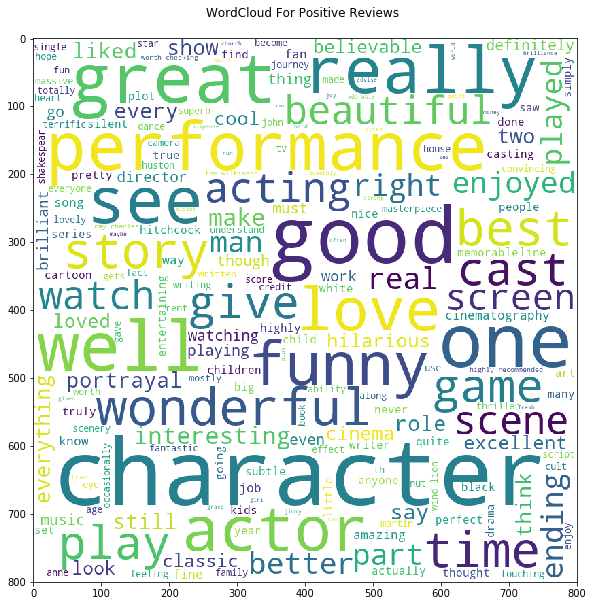

In [357]:
Pos=df[df['sentiments']==1]
Pos_Token=list()
for i in Pos['clean_text']:
    if 'movie' in i or 'film' in i:
        pass
    else:
        Pos_Token=Pos_Token+i.split(" ") #converting string into list
Pos_Corpus=" ".join(Pos_Token)
wordcloud=WordCloud(height=800,width=800,background_color='white').generate(Pos_Corpus)

plt.figure(figsize=(15,10))
plt.title("WordCloud For Positive Reviews \n")
plt.imshow(wordcloud)
plt.show()

### Highly used words in Positive reviews: ###
 1.good<br>
 2.great<br>
 3.really<br>
 4.performance<br>
 5.character<br>
 6.wonderful<br>
 7.funny

## GloVe##

In [358]:
glove2word2vec(glove_input_file='glove.6B.50d.txt',word2vec_output_file="Vect.txt")
model=KeyedVectors.load_word2vec_format("Vect.txt")

Now let's Make 2 DataFrames, Normalised Sentence Vectors and Not-Normalised Sentence Vectors.<br>
<br>
##### Not-Normalised Sentence Vectors=Sentence vector(S)[50-dim]= (word_vector(w1)+word_vector(w2)+word_vector(w3))

##### Normalised Sentence Vectors=Sentence vector normalized(S)[50-dim]= (word_vector(w1)+word_vector(w2)+word_vector(w3))/ (number of words)

## summing vectors for text-reviews##
### Not-Normalized###

In [359]:
Def_List=[0]*50   #for those words whose vectors are not present in glove are assigned 0 
def Get_Sum(x,Def_List,ret_val):
    vec=Def_List
    for i in x:
        try:
            vec=np.add(vec,model[i])
        except:
            vec=np.add(vec,Def_List)
            continue
    return vec[ret_val]
Not_Norm=df
for i in range(50):
    Not_Norm['Vector'+str(i)]=Not_Norm['clean_text'].apply(Get_Sum,args=[Def_List,i])
Not_Norm

,Reviews,sentiments,clean_text,Text_length,Vector0,Vector1,Vector2,Vector3,Vector4,Vector5,...,Vector40,Vector41,Vector42,Vector43,Vector44,Vector45,Vector46,Vector47,Vector48,Vector49
0,"A very, very, very slow-moving, aimless movie ...",0,slow moving aimless movie distressed drifting ...,8,-4.399784,45.077640,31.625393,32.808740,15.453526,-1.800872,...,35.873034,2.314871,-5.322156,-6.397987,-6.757520,17.696773,9.061295,-22.889056,13.855254,44.784390
1,Not sure who was more lost - the flat characte...,0,sure lost flat characters audience nearly half...,8,-3.657571,35.319440,31.312782,33.629700,15.296426,4.172126,...,37.405086,7.378946,-12.611744,-2.830040,-5.206405,14.979265,10.334363,-12.858325,14.471065,47.826581
2,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...,19,-5.963998,98.830321,81.481365,80.662461,45.880886,-2.751228,...,98.468613,8.229754,-24.949227,0.708172,-9.477279,37.161175,24.518988,-48.027115,45.230093,101.153631
3,Very little music or anything to speak of.,0,little music anything speak,4,-2.198960,19.073360,17.475646,15.694680,12.446870,-1.191864,...,16.890707,-1.862887,-5.217688,0.850767,-2.754585,3.553532,5.005557,-9.105618,8.246707,19.201900
4,The best scene in the movie was when Gerardo i...,1,best scene movie gerardo trying find song keep...,10,-2.138763,43.734570,36.795355,37.040140,15.981270,0.050821,...,42.671883,6.984461,-10.283979,-4.393833,-8.147109,19.283232,10.407339,-23.357462,15.592644,58.393861
5,"The rest of the movie lacks art, charm, meanin...",0,rest movie lacks art charm meaning emptiness w...,10,-4.972372,48.587450,42.384859,41.033950,20.786156,-1.202395,...,41.865657,2.506785,-7.324243,0.049551,-7.850779,13.301211,12.989613,-21.457237,17.055260,44.356011
6,Wasted two hours.,0,wasted two hours,3,-2.923392,13.281640,10.485220,12.271470,3.140832,-1.266746,...,12.267350,1.245694,-2.934419,-1.623935,0.689356,4.448883,1.602115,-6.126136,5.937574,14.050210
7,Saw the movie today and thought it was a good ...,1,saw movie today thought good effort good messa...,9,-4.295178,43.865270,27.748852,36.668900,12.858076,-3.347665,...,37.502471,2.973905,-4.074136,-8.526907,-1.553525,12.848042,7.411078,-22.168221,17.963310,46.802550
8,A bit predictable.,0,bit predictable,2,-0.844200,8.154610,8.273744,8.580900,5.338610,1.960214,...,10.509451,2.840414,-3.404492,1.905802,0.187115,5.979140,2.463830,-5.189122,4.458516,14.299560
9,Loved the casting of Jimmy Buffet as the scien...,1,loved casting jimmy buffet science teacher,6,-2.991091,29.144860,24.947399,26.544480,12.984840,-3.900687,...,33.195197,3.661689,-2.766031,-1.118713,-4.755133,13.366833,7.362949,-16.792788,11.197797,34.346510


### Normalized ###

In [360]:
Def_List=[0]*50
def Get_Sum(x,Def_List,ret_val):
    vec=Def_List
    for i in x:
        try:
            vec=np.add(vec,model[i])
        except:
            vec=np.add(vec,Def_List)
            continue
    vec=np.divide(vec,len(vec))
    return vec[ret_val]

Norm=df
for i in range(50):
    Norm['Vector'+str(i)]=Not_Norm['clean_text'].apply(Get_Sum,args=[Def_List,i])
Norm

,Reviews,sentiments,clean_text,Text_length,Vector0,Vector1,Vector2,Vector3,Vector4,Vector5,...,Vector40,Vector41,Vector42,Vector43,Vector44,Vector45,Vector46,Vector47,Vector48,Vector49
0,"A very, very, very slow-moving, aimless movie ...",0,slow moving aimless movie distressed drifting ...,8,-0.087996,0.901553,0.632508,0.656175,0.309071,-0.036017,...,0.717461,0.046297,-0.106443,-0.127960,-0.135150,0.353935,0.181226,-0.457781,0.277105,0.895688
1,Not sure who was more lost - the flat characte...,0,sure lost flat characters audience nearly half...,8,-0.073151,0.706389,0.626256,0.672594,0.305929,0.083443,...,0.748102,0.147579,-0.252235,-0.056601,-0.104128,0.299585,0.206687,-0.257167,0.289421,0.956532
2,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...,19,-0.119280,1.976606,1.629627,1.613249,0.917618,-0.055025,...,1.969372,0.164595,-0.498985,0.014163,-0.189546,0.743224,0.490380,-0.960542,0.904602,2.023073
3,Very little music or anything to speak of.,0,little music anything speak,4,-0.043979,0.381467,0.349513,0.313894,0.248937,-0.023837,...,0.337814,-0.037258,-0.104354,0.017015,-0.055092,0.071071,0.100111,-0.182112,0.164934,0.384038
4,The best scene in the movie was when Gerardo i...,1,best scene movie gerardo trying find song keep...,10,-0.042775,0.874691,0.735907,0.740803,0.319625,0.001016,...,0.853438,0.139689,-0.205680,-0.087877,-0.162942,0.385665,0.208147,-0.467149,0.311853,1.167877
5,"The rest of the movie lacks art, charm, meanin...",0,rest movie lacks art charm meaning emptiness w...,10,-0.099447,0.971749,0.847697,0.820679,0.415723,-0.024048,...,0.837313,0.050136,-0.146485,0.000991,-0.157016,0.266024,0.259792,-0.429145,0.341105,0.887120
6,Wasted two hours.,0,wasted two hours,3,-0.058468,0.265633,0.209704,0.245429,0.062817,-0.025335,...,0.245347,0.024914,-0.058688,-0.032479,0.013787,0.088978,0.032042,-0.122523,0.118751,0.281004
7,Saw the movie today and thought it was a good ...,1,saw movie today thought good effort good messa...,9,-0.085904,0.877305,0.554977,0.733378,0.257162,-0.066953,...,0.750049,0.059478,-0.081483,-0.170538,-0.031071,0.256961,0.148222,-0.443364,0.359266,0.936051
8,A bit predictable.,0,bit predictable,2,-0.016884,0.163092,0.165475,0.171618,0.106772,0.039204,...,0.210189,0.056808,-0.068090,0.038116,0.003742,0.119583,0.049277,-0.103782,0.089170,0.285991
9,Loved the casting of Jimmy Buffet as the scien...,1,loved casting jimmy buffet science teacher,6,-0.059822,0.582897,0.498948,0.530890,0.259697,-0.078014,...,0.663904,0.073234,-0.055321,-0.022374,-0.095103,0.267337,0.147259,-0.335856,0.223956,0.686930


### Preparing data for Training ##

In [361]:
Norm=Norm.drop(['Reviews','clean_text','Text_length'],axis=1) # normalized
Not_Norm=Not_Norm.drop(['Reviews','clean_text','Text_length'],axis=1) #not-normalized

### Y-Label ###

In [362]:
Y_Norm = df['sentiments']
Y_Not_Norm = df['sentiments']

In [363]:
Norm=Norm.drop(['sentiments'],axis=1)
Not_Norm=Not_Norm.drop(['sentiments'],axis=1)

### Training using different kinds of Algorithm and Testing (by finding accuracy score and f1_score)  ###

In [364]:
X_Train_Not_Norm,X_Test_Not_Norm,Y_Train_Not_Norm,Y_Test_Not_Norm=train_test_split(Not_Norm,Y_Not_Norm,test_size=0.2,
                                                                                   random_state=1) # not-normalized

In [365]:
X_Train_Norm,X_Test_Norm,Y_Train_Norm,Y_Test_Norm=train_test_split(Norm,Y_Norm,test_size=0.2,
                                                                                   random_state=1) # normalized

## Not-Normalized  model training##

## Logistic Regression ##

In [366]:
lg = LogisticRegression()
lg.fit(X_Train_Not_Norm,Y_Train_Not_Norm)
predict = lg.predict(X_Test_Not_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(Pred,Y_Test_Not_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(Pred,Y_Test_Not_Norm)))

Accuracy : 53.50 %
F1-Score : 0.53 


## Hyperparameter tuning ##

In [367]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
clf.fit(X_Train_Not_Norm, Y_Train_Not_Norm)
clf.best_estimator_.C

1000

after tuning  C is found to be 1000 as best estimator

In [368]:
lg = LogisticRegression(C=1000)
lg.fit(X_Train_Not_Norm,Y_Train_Not_Norm)
predict = lg.predict(X_Test_Not_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(predict,Y_Test_Not_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(predict,Y_Test_Not_Norm)))
f1 = accuracy_score(predict,Y_Test_Not_Norm)

Accuracy : 59.50 %
F1-Score : 0.55 


 both accurcy score and f1_score increases
## Naive Bayes ##

In [369]:
Nb=GaussianNB()
Nb.fit(X_Train_Not_Norm,Y_Train_Not_Norm)
Pred=Nb.predict(X_Test_Not_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(Pred,Y_Test_Not_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(Pred,Y_Test_Not_Norm)))
f2=accuracy_score(Pred,Y_Test_Not_Norm)

Accuracy : 56.00 %
F1-Score : 0.35 


since accuracy_score is less than logistic regression,we won't consider it

## SVM ##

In [370]:
sv = SVC()
sv.fit(X_Train_Not_Norm,Y_Train_Not_Norm)
pred = sv.predict(X_Test_Not_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(pred,Y_Test_Not_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(pred,Y_Test_Not_Norm)))


Accuracy : 53.50 %
F1-Score : 0.44 


accuracy is very less than logistic regression so we won't work for hyperparameter tuning.

## Random Forest ##

In [371]:
Rfc=RandomForestClassifier(random_state=12)
Rfc.fit(X_Train_Not_Norm,Y_Train_Not_Norm)
Pred=Rfc.predict(X_Test_Not_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(Pred,Y_Test_Not_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(Pred,Y_Test_Not_Norm)))

Accuracy : 55.00 %
F1-Score : 0.53 


## Hyperparameter tuning##

In [375]:
rf_params = { 
    'n_estimators': [200,300,600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth':np.arange(5,15,1)
}

gs_random = GridSearchCV(estimator=rf, param_grid=rf_params, cv= 4)
gs_random.fit(X_Train_Not_Norm, Y_Train_Not_Norm)
print (gs_random.best_params_)

{'max_depth': 14, 'max_features': 'log2', 'n_estimators': 200}


best parameters are fetched after tuning 

In [382]:
Rfc=RandomForestClassifier(random_state=200,max_depth= 14, max_features='log2', n_estimators= 200)
Rfc.fit(X_Train_Not_Norm,Y_Train_Not_Norm)
Pred=Rfc.predict(X_Test_Not_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(Pred,Y_Test_Not_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(Pred,Y_Test_Not_Norm)))
f4 = accuracy_score(Pred,Y_Test_Not_Norm)

Accuracy : 55.50 %
F1-Score : 0.55 


both accurcy score and f1_score increases and reaches 55.5%.

## Normalized model training ##

## Logistic Regression##

In [377]:
LG = LogisticRegression()
LG.fit(X_Train_Norm,Y_Train_Norm)
PredicT = LG.predict(X_Test_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(PredicT,Y_Test_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(PredicT,Y_Test_Norm)))


Accuracy : 54.50 %
F1-Score : 0.50 


## Hyperparameter Tuning

In [383]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
clf.fit(X_Train_Norm, Y_Train_Norm)
clf.best_estimator_.C

1000

C hyperparameter is found after Tuning

In [384]:
LG1 = LogisticRegression(C=1000)
LG1.fit(X_Train_Norm,Y_Train_Norm)
PrediCT = LG1.predict(X_Test_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(PrediCT,Y_Test_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(PrediCT,Y_Test_Norm)))
F1=accuracy_score(PrediCT,Y_Test_Norm)

Accuracy : 59.50 %
F1-Score : 0.55 


both accuracy score and f1_score increases to a good level

## Naive-Bayes

In [385]:
NB=GaussianNB()
NB.fit(X_Train_Norm,Y_Train_Norm)
PRED=NB.predict(X_Test_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(Pred,Y_Test_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(PRED,Y_Test_Norm)))
F2 = accuracy_score(Pred,Y_Test_Norm)

Accuracy : 55.50 %
F1-Score : 0.35 


accuracy is low than logistic regression so we won't consider it.

## SVM

In [386]:
SV = SVC()
SV.fit(X_Train_Norm,Y_Train_Norm)
PRed = SV.predict(X_Test_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(PRed,Y_Test_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(PRed,Y_Test_Norm)))

Accuracy : 53.50 %
F1-Score : 0.44 


Accuracy is not upto the mark

## Random Forest##

In [387]:
Rf = RandomForestClassifier(random_state=200)
Rf.fit(X_Train_Norm,Y_Train_Norm)
PREdict = Rf.predict(X_Test_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(PREdict,Y_Test_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(PREdict,Y_Test_Norm)))

Accuracy : 54.50 %
F1-Score : 0.47 


## Hyperparameter tuning

In [388]:
rf_params = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth':np.arange(5,15,1)
}

gs_random = GridSearchCV(estimator=Rf, param_grid=rf_params, cv= 5)
gs_random.fit(X_Train_Norm, Y_Train_Norm)
print (gs_random.best_params_)


{'max_depth': 11, 'max_features': 'log2', 'n_estimators': 200}


best parameters are selected after Tuning.

In [389]:
Rf1 = RandomForestClassifier(random_state=100,max_depth= 11, max_features= 'log2', n_estimators= 200)
Rf1.fit(X_Train_Norm,Y_Train_Norm)
PREDict = Rf1.predict(X_Test_Norm)
print("Accuracy : {:.2f} %".format(accuracy_score(PREDict,Y_Test_Norm)*100))
print("F1-Score : {:.2f} ".format(f1_score(PREDict,Y_Test_Norm)))
F4 = accuracy_score(PREDict,Y_Test_Norm)

Accuracy : 55.50 %
F1-Score : 0.56 


there is an increase in accuracy score and f1-score slightly.

# OBSERVATIONS #

##  For Not-Normalized data

In [390]:
Accuracy = [f1,f2,f3,f4]

Algo = ['LogisticRegression','GaussianNB','SVM(rbf)','Random Forest']


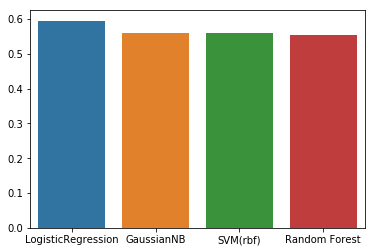

In [391]:
sns.barplot(y=Accuracy,x=Algo,data=df)

Logistic Regression has highest accuracy_score

## for Normalized data

In [392]:
Accuracy = [F1,F2,F3,F4]

Algo = ['LogisticRegression','GaussianNB','SVM(rbf)','Random Forest']

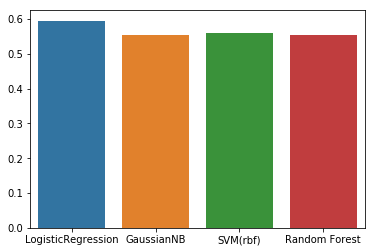

In [393]:
sns.barplot(x=Algo,y=Accuracy)

Logistic Regression has highest accuracy_score
### Conclusion 

* Logistic Regression has highest accuracy than any other model for both the cases(Normalized and Not-Normalized datasets).
* Got 59.5% accuracy for not-normalized and normalized data using Logistic Regression technique<br>
* This model can analyse any reviews' sentiments nearly upto 50% correctness which is an average performance of the model.<br>
* After performing Hyperparameter-tuning accuracy_score and f1_score increases<br>
* All the 4 models differ in scores from each other.<br>
* Logistic Regression and Random-Forest modelling techniques performs the best after Tuning(Thus tuning is very necessary :)). <br>
* Tuning is done to avoid overfitting and underfitting of the data and for removing some kind of noises.<br>
* Collected data is not skewed much (i.e. both positive and negative reviews differ slightly)<br>
